# Project Objective

- **The objective of this assignment is to train a machine learning model that can accurately classify various product and brand names from input images.**
- The model should be capable of identifying the following brands: ***Saslic, 8X shampoo, WoW skincare, Head & Shoulder, P&G, Dove, L'Oreal, and Mamaearth.***
- Sample product images have been provided for three of the brands, namely Saslic, 8X shampoo, and WoW skincare. However, the data sets for the remaining five brands must be collected manually by the candidate. These data sets should consist of various product images for each brand.

## Steps to follow :

1. **Image collection -**
    With the help of simple-image-download library we can download atleast 100 images for each of the above mentioned brands from Google Images and store them in a folder named as the brand name.
    
    
2. **Image cleaning -**
    Next we have to check all the downloaded images nd delete the invalid or useless ones.
    
    
3. **Image Labeling -**


4. **Data Ingestion -**


5. **Create Database -**


6. **Split Train and Test data -**


7. **Build and train Model -**

## Step 1- Image collection by web scraping

In [1]:
%pip install simple-image-download


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from simple_image_download import simple_image_download as simp 
response = simp.simple_image_download
lst=["Saslic", "8X shampoo", "WoW skincare", "Head & Shoulder", "P&G",
     "Dove", "L'Oreal", "Mamaearth"]
for rep in lst:
    response().download(rep+" Products" , 100)

('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


KeyboardInterrupt: 

### Alternate approach to download images using bing

In [3]:
%pip install bing-image-downloader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from bing_image_downloader import downloader

lst=["Saslic", "8X shampoo", "WoW skincare", "Head & Shoulder", "P&G",
     "Dove", "L'Oreal", "Mamaearth"]
     
for query_string in lst:
    downloader.download(query_string, limit=100,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)


[%] Downloading Images to /media/tinku/Education/Internship_Assignments/Pirates Alert/dataset/Saslic


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://cdn01.pharmeasy.in/dam/products/193315/saslic-face-wash-60ml-box-back-4-1597361112.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://res.cloudinary.com/du8msdgbj/images/a_ignore,w_690,h_700,c_pad,q_auto,f_auto/v1532517622/lmw30knpkzitqdztz6jn/saslic-ds-foaming-face-wash.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://2.bp.blogspot.com/-H4aj0qfpryE/XXoibK_JglI/AAAAAAAAWYg/zgBKvzZlrXYDxB5rKWIn2G_x1k3-RdqegCK4BGAYYCw/s1600/2019-09-01-17-58-13.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://5.imimg.com/data5/JW/SV/MY-2581214/saslic-foam-face-wash-500x500.png
[%] File Downloaded !

[%] Downloading Image #5 from https://www.skinpharmacy.in/wp-content/uploads/2019/12/CIPLA-SASLIC-DS-FOAMING-FACE-WASH.jpg
[!] Issue getting: https://www.skinpharmacy.in

KeyboardInterrupt: 

## Image labeling, Data ingestion and Dataset building

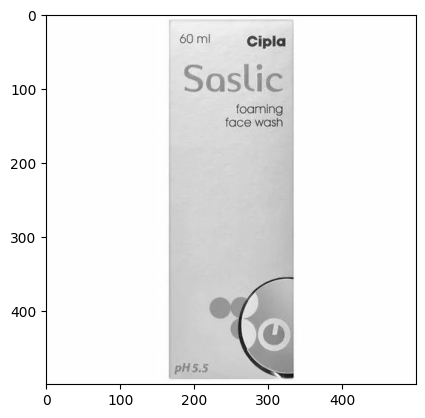

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "simple_images"

CATEGORIES = ["Saslic", "8X shampoo", "WoW skincare", "Head & Shoulder", "P&G",
             "Dove", "L'Oreal", "Mamaearth"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category+" Products")  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

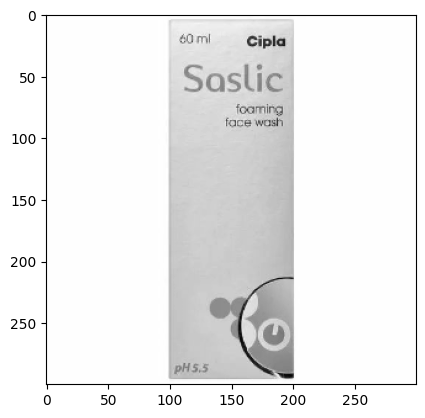

In [10]:
IMG_SIZE = 300

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [15]:
IMG_SIZE = 800
DATADIR = "simple_images"

CATEGORIES = ["Saslic", "8X shampoo", "WoW skincare", "Head & Shoulder", "P&G",
                "Dove", "L'Oreal", "Mamaearth"]

def create_training_data():    
    try:
        training_data = []
        for category in CATEGORIES:  # do dogs and cats
            path = os.path.join(DATADIR,category+" Products")  # create path to dogs and cats
            class_num = CATEGORIES.index(category)  # get the classification  
            for img in os.listdir(path):  # iterate over each image per dogs and cats
                img_array = cv2.imread(os.path.join(path,img)) # ,cv2.IMREAD_GRAYSCALE)  # convert to array
                # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
    # except Exception as e:  # in the interest in keeping the output clean...
    #     pass
    except OSError as e:
        print("OSErrroBad img most likely", e, os.path.join(path,img))
    except Exception as e:
        print("general exception", e, os.path.join(path,img))
    return training_data

training_data = create_training_data()

print(len(training_data))

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


691


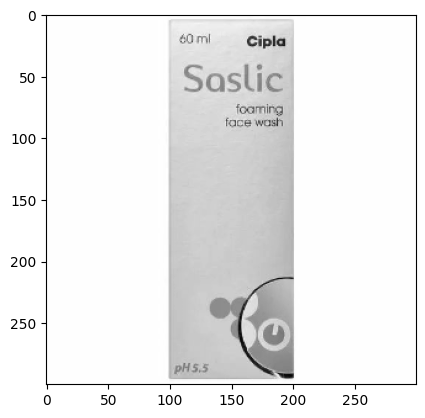

In [16]:
plt.imshow(training_data[21][0], cmap='gray')
plt.show()

In [17]:
# random suffling of images for better training

import random

random.shuffle(training_data)

In [18]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [19]:
label_count = [0,0,0,0,0,0,0,0]
for features,label in training_data:
    label_count[label] += 1

for i in range(8):
    print(f"{CATEGORIES[i] } --> {label_count[i]} images.")

Saslic --> 92 images.
8X shampoo --> 89 images.
WoW skincare --> 87 images.
Head & Shoulder --> 87 images.
P&G --> 79 images.
Dove --> 86 images.
L'Oreal --> 85 images.
Mamaearth --> 86 images.


In [20]:
# save the dataset
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Reload the Dataset

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

## Model Building

In [21]:
%pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16

# Load the pre-trained VGG16 model without the fully connected layers
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(400, 400, 3))

# Freeze the pre-trained layers so they are not trained again
for layer in vgg.layers:
    layer.trainable = False

# Build the classification model on top of the pre-trained VGG16
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the model summary
model.summary()


2023-02-21 16:53:48.817722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 16:53:49.299694: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tinku/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-21 16:53:49.299717: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-21 16:53:50.552298: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerro

2023-02-21 16:53:51.958091: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-21 16:53:51.958334: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tinku/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-21 16:53:51.958392: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tinku/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-21 16:53:51.958436: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load

58889256/58889256 [==============================] - 12s 0us/step


2023-02-21 16:54:05.760978: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.
2023-02-21 16:54:05.826355: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.
2023-02-21 16:54:05.902474: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 12, 12, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 512)               37749248  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 52,469,066
Trainable params: 37,754,378
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [27]:
def VGG_custom(input_tensor=None,classes=8):    
   
    img_rows, img_cols = 400, 400   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

In [28]:
model = VGG_custom(classes = 8)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2023-02-21 16:55:57.965138: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1207959552 exceeds 10% of free system memory.
2023-02-21 16:55:58.608921: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1207959552 exceeds 10% of free system memory.


In [29]:
# Train test split

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X = np.array(X)
y = np.array(y)
X, y = shuffle(X, y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(656, 300, 300)
(656,)
(35, 300, 300)
(35,)


In [ ]:
model.fit(train_x, train_y, epochs = 10, batch_size = 30)  

Epoch 1/10


ValueError: in user code:

    File "/home/tinku/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/tinku/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/tinku/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/tinku/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/tinku/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/tinku/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/tinku/.local/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/tinku/.local/lib/python3.10/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/tinku/.local/lib/python3.10/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/tinku/.local/lib/python3.10/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (320, 1) and (320, 8) are incompatible


In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
